## [NCTS]作業8-1 使用Functional API打造具有分岔的神經網路


In [57]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ipywidgets import interact, IntSlider

#NN-related
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import SGD, Adam

# dataset
from keras.datasets import mnist

# something useful
from keras.utils import to_categorical

from keras.utils import np_utils

env: KERAS_BACKEND=tensorflow


### 由 Keras 讀入 MNIST

In [4]:
(x_train0,y_train0),(x_test0,y_test0) = mnist.load_data()

In [5]:
print("共 %d 訓練資料，每筆資料的尺寸為 %d x %d" %x_train0.shape)

共 60000 訓練資料，每筆資料的尺寸為 28 x 28


###  整理資料以便輸入

In [8]:
x_train = x_train0.reshape(60000,28*28)
x_test = x_test0.reshape(x_test0.shape[0],28*28)

#將資料線性單位化
x_train -= x_train.min()
x_train = x_train/x_train.max()

x_test -= x_test.min()
x_test = x_test/x_test.max()

#y 我想使用 one-hot encoding
y_train_num = to_categorical(y_train0,10)
y_test_num = to_categorical(y_test0,10)

###  匯入 Functional API 的套件

In [10]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

###  設計的神經網路如下

<img src="hw8-1.png" alt="drawing" style="width: 800px;"/>

In [12]:
x = Input(shape=(784,))

#First layer

f_1 = Dense(400, activation='sigmoid')
f_2 = Dense(200, activation='sigmoid')
f_3 = Dense(400, activation='sigmoid')


h_1 = f_1(x)
h_2 = f_2(x)
h_3 = f_3(x)

In [14]:
#First concatenate

u_1 = concatenate([h_1, h_2, h_3])

In [15]:
#Second layer
f_4 = Dense(500, activation='sigmoid')

h_4 = f_4(u_1)

In [17]:
#Third layer

f_5 = Dense(300, activation='relu')
f_6 = Dense(300, activation='relu')

h_5 = f_5(h_4)
h_6 = f_6(h_4)

In [19]:
#Second concatenate

u_2 = concatenate([h_5, h_6])

In [21]:
#last layer

f_7 = Dense(10, activation='softmax')

y = f_7(u_2)

In [77]:
# 建模並且查看

model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 400)          314000      input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 200)          157000      input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 400)          314000      input_2[0][0]                    
__________________________________________________________________________________________________
concatenat

#### 神經網路建立完後，第一步就是將 model 做 compile

In [78]:
model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])

#### model fit

In [79]:
model_1 = model.fit(x_train, y_train_num, batch_size=100, epochs=5,verbose=1,validation_data=(x_test,y_test_num))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 335us/step - loss: 0.0016 - acc: 0.9901 - val_loss: 0.0033 - val_acc: 0.9792
Epoch 2/5
60000/60000 [==============================] - 19s 321us/step - loss: 0.0015 - acc: 0.9910 - val_loss: 0.0035 - val_acc: 0.9785
Epoch 3/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.0013 - acc: 0.9919 - val_loss: 0.0035 - val_acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 20s 327us/step - loss: 0.0012 - acc: 0.9924 - val_loss: 0.0033 - val_acc: 0.9794
Epoch 5/5
60000/60000 [==============================] - 19s 315us/step - loss: 0.0011 - acc: 0.9936 - val_loss: 0.0031 - val_acc: 0.9819


### Training data accuracy plot

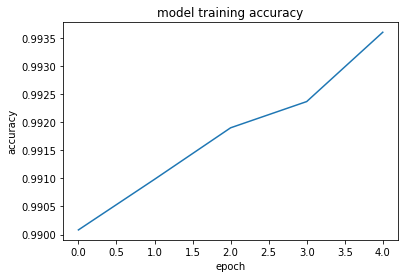

In [80]:
plt.plot(model_1.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

### Testing data accuracy plot

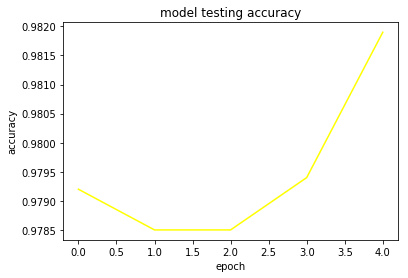

In [81]:
plt.plot(model_1.history["val_acc"],color="yellow")
plt.title("model testing accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

### Testing data 預測表現

In [82]:
score = model.evaluate(x_test, y_test_num, batch_size=100)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

10000/10000 [==============================] - 1s 75us/step
Loss: 0.003088
準確率: 98.190001


### 結論

     原本 optimizer 使用 SGD accuracy 不到 20%，換了 adam 之後馬上衝到 98% ，只能說 adam 太強大了。不知道是否因為我的神經網路結構不適合SGD，而是適合 adam。